# ÂÉèNumPy‰∏ÄÊ†∑‰ΩøÁî®TensorFlow 

## Âº†ÈáèÂíåÊìç‰Ωú Tensors and Operations

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras

np.random.seed(42)
tf.random.set_seed(42)

### Âº†Èáè Tensors

‰ΩøÁî®`tf.constant()`ÂàõÂª∫Âº†Èáè

In [2]:
t = tf.constant([
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
    [[10, 11, 12], [13, 14, 15], [16, 11, 12]],
])
t

2022-10-26 10:17:51.089867: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 10:17:51.196799: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 10:17:51.196965: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 10:17:51.199855: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

<tf.Tensor: shape=(2, 3, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 11, 12]]], dtype=int32)>

In [3]:
t.shape, t.dtype

(TensorShape([2, 3, 3]), tf.int32)

### Á¥¢Âºï indexing

In [4]:
t[:, 1:]

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 4,  5,  6],
        [ 7,  8,  9]],

       [[13, 14, 15],
        [16, 11, 12]]], dtype=int32)>

In [5]:
t[..., 1, tf.newaxis]  
# ‚Ä¶ ‰ª£Ë°®Â§ö‰∏™Áª¥Â∫¶‰∏äÁöÑÂàáÁâá 
# tf.newaxis  Â¢ûÂä†Áª¥Â∫¶

<tf.Tensor: shape=(2, 3, 1), dtype=int32, numpy=
array([[[ 2],
        [ 5],
        [ 8]],

       [[11],
        [14],
        [11]]], dtype=int32)>

### Êìç‰Ωú ops

In [6]:
t + 10   # tf.add(t, 10)

<tf.Tensor: shape=(2, 3, 3), dtype=int32, numpy=
array([[[11, 12, 13],
        [14, 15, 16],
        [17, 18, 19]],

       [[20, 21, 22],
        [23, 24, 25],
        [26, 21, 22]]], dtype=int32)>

In [7]:
tf.square(t)

<tf.Tensor: shape=(2, 3, 3), dtype=int32, numpy=
array([[[  1,   4,   9],
        [ 16,  25,  36],
        [ 49,  64,  81]],

       [[100, 121, 144],
        [169, 196, 225],
        [256, 121, 144]]], dtype=int32)>

In [8]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t @ tf.transpose(t)   # t*(t^T)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

Âú®tf‰∏≠ÂèØ‰ª•ÊâæÂà∞ÊâÄÊúâÁöÑÂü∫Êú¨Êï∞Â≠¶ËøêÁÆóÂíå`Numpy`‰∏≠ÁöÑÂ§ßÂ§öÊï∞ËøêÁÆó.ÂÖ∂‰∏≠,Êüê‰∫õÂêçÁß∞‰∏é`Numpy`‰∏≠ÊúâÊâÄ‰∏çÂêå:
- `tf.reduce_mean()` ~ `np.mean()`
- `tf.reduce_sum()` ~ `np.sum()`
- `tf.reduce_max()` ~ `np.max()`
- `tf.math.log()` ~ `np.log()`

- ÁêÜËß£`reduce`

    Áª¥Â∫¶ÊòØÁî®Êù•Á¥¢Âºï‰∏Ä‰∏™Â§öÁª¥Êï∞ÁªÑ‰∏≠Êüê‰∏™ÂÖ∑‰ΩìÊï∞ÊâÄÈúÄË¶ÅÊúÄÂ∞ëÁöÑÂùêÊ†á.`axis`ÊòØÂ§öÁª¥Êï∞ÁªÑÊØè‰∏™Áª¥Â∫¶ÁöÑÂùêÊ†á.`reduce`ÂèØ‰ª•Ëß£Èáä‰∏∫‚ÄúÂ°åÁº©‚Äù,Âç≥`Êéâ‰∏ÄÂ±ÇÊñπÊã¨Âè∑`.

    ÂØπ‰∫é$k$Áª¥ÁöÑÔºå`tf.reduce_sum(x, axis=k-1)`ÁöÑÁªìÊûúÊòØÂØπ**ÊúÄÈáåÈù¢‰∏ÄÁª¥ÊâÄÊúâÂÖÉÁ¥†**ËøõË°åÊ±ÇÂíå„ÄÇ`tf.reduce_sum(x, axis=k-2)`ÊòØÂØπ**ÂÄíÊï∞Á¨¨‰∫åÂ±ÇÈáåÁöÑÂêëÈáèÂØπÂ∫îÁöÑÂÖÉÁ¥†**ËøõË°åÊ±ÇÂíå„ÄÇ`tf.reduce_sum(x, axis=k-3)`Êää**ÂÄíÊï∞Á¨¨‰∏âÂ±ÇÁöÑÊØè‰∏™ÂêëÈáèÂØπÂ∫îÂÖÉÁ¥†**Áõ∏Âä†„ÄÇ


<img src="../images/other/12-1.png" width="700">

### Keras ÁöÑÂ∫ïÂ±ÇAPI

`kerar API`Âú®`keras.backend`‰∏≠ÊúâËá™Â∑±ÁöÑÂ∫ïÂ±ÇAPI.Â¶ÇÊûúË¶ÅÁºñÂÜôÂèØÁßªÊ§çÂà∞ÂÖ∂‰ªñ`Keras`ÂÆûÁé∞ÁöÑ‰ª£Á†Å,Â∫îÂΩì‰ΩøÁî®Ëøô‰∫õÂáΩÊï∞.

In [9]:
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [10]:
from tensorflow import keras
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

##  Âº†ÈáèÂíåNumPy 

Âº†ÈáèÂèØ‰ª•‰∏éNumpyÈÖçÂêà‰ΩøÁî®.NumPyÈªòËÆ§Á≤æÂ∫¶‰∏∫`float64`, TensorFlowÈªòËÆ§Á≤æÂ∫¶‰∏∫`float32`

In [11]:
a = np.array([2., 3., 4.])
tf.constant(a, dtype=np.float32)   # ‰ªéNumpy‰∏≠ÂàõÂª∫Âº†ÈáèÊó∂,Ê≥®ÊÑèË¶ÅËÆæÁΩÆdtype

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

In [12]:
t.numpy()  

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [13]:
tf.square(a)   # Â∞ÜTensorFlowÊìç‰ΩúÂ∫îÁî®‰∫éNumpyÊï∞ÁªÑ.

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4.,  9., 16.])>

In [14]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

## Á±ªÂûãËΩ¨Êç¢ Type Conversions

Á±ªÂûãËΩ¨Êç¢‰ºö‰∏•ÈáçÂΩ±ÂìçÊÄßËÉΩ,Âπ∂‰∏îÂú®Ëá™Âä®ÂÆåÊàêËΩ¨Êç¢Êó∂ÂæàÂÆπÊòìË¢´ÂøΩËßÜ.Âõ†Ê≠§Âú®TensorFlow‰∏ç‰ºöËá™Âä®ÊâßË°å‰ªª‰ΩïÁ±ªÂûãËΩ¨Êç¢.

In [15]:
try:
    tf.constant(2.0) + tf.constant(1)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


ÂΩì‰Ω†Á°ÆÂÆûÈúÄË¶Å‰ΩøÁî®Á±ªÂûãËΩ¨Êç¢Êó∂,‰ΩøÁî®`tf.cast()`

In [16]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, dtype=tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

## ÂèòÈáè Variables

In [17]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

‰ΩøÁî®`assign()`ÁªôÂèòÈáèÊ∑ªÂä†ÊàñÂáèÂ∞ëÂèòÂÄº,ÊàñÈÄöËøáÂàáÁâáÁöÑÊñπÊ≥ï‰øÆÊîπÊüê‰∏™ÂçïÂÖÉÊ†ºÁöÑÂÄº.

In [18]:
v.assign(v*2)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [19]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [20]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

‰ΩøÁî®`scatter_nd_update()`‰øÆÊîπÊüê‰∏™ÂçïÂÖÉÊ†ºÁöÑÂÄº.

In [21]:
v.scatter_nd_update(indices=[[0,0], [1,2]],
                    updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

‰∫ãÂÆû‰∏ä,Âá†‰πé‰∏çÈúÄË¶ÅÊâãÂä®ÂàõÂª∫ÂèòÈáè,Âõ†‰∏∫kerasÊèê‰æõ‰∫Ü`add_weight()`ÊñπÊ≥ïÊù•Ëß£ÂÜ≥ÈóÆÈ¢ò.Âπ∂‰∏îÊ®°ÂûãÂèÇÊï∞ÈÄöÂ∏∏Áî±‰ºòÂåñÂô®Áõ¥Êé•Êõ¥Êñ∞.

## ÂÖ∂‰ªñÊï∞ÊçÆÁªìÊûÑ Other Data Structures

### Â≠óÁ¨¶‰∏≤ Strings

Âº†ÈáèÂèØ‰ª•ÂÆπÁ∫≥Â≠óÁ¨¶‰∏≤,Â¶ÇÊûú‰ΩøÁî®`Unicode`Â≠óÁ¨¶‰∏≤ÂàõÂª∫‰∏Ä‰∏™Âº†Èáè,Âàô‰ºöËá™Âä®Â∞ÜÂÖ∂ÁºñÁ†ÅÊàê`UTF-8`.

In [22]:
tf.constant("hello world!")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world!'>

In [23]:
u = tf.constant("‰Ω†Â•Ω ‰∏ñÁïå!")
u

<tf.Tensor: shape=(), dtype=string, numpy=b'\xe4\xbd\xa0\xe5\xa5\xbd \xe4\xb8\x96\xe7\x95\x8c!'>

In [24]:
tf.strings.length(u, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=6>

Êìç‰ΩúÂåÖÂê´Â§ö‰∏™Â≠óÁ¨¶‰∏≤ÁöÑÂº†Èáè:

In [25]:
p = tf.constant(["Caf√©", "Coffee", "caff√®", "ÂíñÂï°"])

tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2], dtype=int32)>

# ÂÆöÂà∂Ê®°ÂûãÂíåËÆ≠ÁªÉÁÆóÊ≥ï Customizing Models and Training Algorithms

‰ª•Âä†Â∑ûÊàø‰ª∑Êï∞ÊçÆÈõÜ‰∏∫‰æãÂä†ËΩΩÊï∞ÊçÆÈõÜ,Âπ∂ÂàõÂª∫ËÆ≠ÁªÉÈõÜ,È™åËØÅÈõÜ‰ª•ÂèäÊµãËØïÈõÜ,Âπ∂Â∞ÜÂÖ∂ËæìÂÖ•Ê†áÂáÜÂåñ.

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
housing = fetch_california_housing()
X = housing.data
y = housing.target
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Ëá™ÂÆö‰πâÊçüÂ§±ÂáΩÊï∞  Custom Loss Functions

**HuberÊçüÂ§±ÂáΩÊï∞** Êï¥Âêà‰∫Ü`Âπ≥ÂùáÁªùÂØπËØØÂ∑ÆMAE`Âíå`ÂùáÊñπËØØÂ∑ÆMSE`ÂêÑËá™ÁöÑ‰ºòÁÇπ, Âπ∂ÈÅøÂÖçÂÖ∂Áº∫ÁÇπ.

$$
L_{\delta}(y, f(x))=\left\{\begin{array}{cc}
\frac{1}{2}(y-f(x))^{2} & |y-f(x)| \leq \delta \\
\delta|y-f(x)|-\frac{1}{2} \delta^{2} & \text { otherwise }
\end{array}\right.
$$

- $\delta$ ÊòØHuberÁöÑ‰∏Ä‰∏™Ë∂ÖÂèÇÊï∞, ÂΩìÁúüÂÆûÂÄºÂíåÈ¢ÑÊµãÂÄºÁöÑÂ∑ÆÂÄº $|y-f(x)| \leq \delta$ Êó∂, `Huber`Â∞±ÊòØ`MSE`; ÂΩìÂ∑ÆÂÄºÂú® $(-\infty, \delta)$ ÊàñËÄÖ $(\delta,+\infty)$ Êó∂, `Huber`Â∞±ÊòØ`MAE`„ÄÇ
- Âõ†Ê≠§, ÂΩìËØØÂ∑ÆËæÉÂ§ßÊó∂, ‰ΩøÁî®`MAE`ÂØπÁ¶ªÁæ§ÁÇπ‰∏çÈÇ£‰πàÊïèÊÑü; Âú®ËØØÂ∑ÆËæÉÂ∞èÊó∂‰ΩøÁî®`MSE`, ËÉΩÂ§üÂø´ÈÄüÁöÑÊî∂Êïõ;
- ‰ΩøÁî®`MAE`ËÆ≠ÁªÉÁ•ûÁªèÁΩëÁªúÊúÄÂ§ßÁöÑ‰∏Ä‰∏™ÈóÆÈ¢òÂ∞±ÊòØ‰∏çÂèòÁöÑÂ§ßÊ¢ØÂ∫¶ÔºåËøôÂèØËÉΩÂØºËá¥Âú®‰ΩøÁî®Ê¢ØÂ∫¶‰∏ãÈôçÂø´Ë¶ÅÁªìÊùüÊó∂ÔºåÈîôËøá‰∫ÜÊúÄÂ∞èÁÇπ„ÄÇËÄåÂØπ‰∫é`MSE`ÔºåÊ¢ØÂ∫¶‰ºöÈöèÁùÄÊçüÂ§±ÁöÑÂáèÂ∞èËÄåÂáèÂ∞èÔºå‰ΩøÁªìÊûúÊõ¥Âä†Á≤æÁ°Æ„ÄÇÂú®ËøôÁßçÊÉÖÂÜµ‰∏ãÔºå`Huber`ÊçüÂ§±Â∞±ÈùûÂ∏∏ÊúâÁî®„ÄÇÂÆÉ‰ºöÁî±‰∫éÊ¢ØÂ∫¶ÁöÑÂáèÂ∞èËÄåËêΩÂú®ÊúÄÂ∞èÂÄºÈôÑËøë„ÄÇÊØîËµ∑`MSE`ÔºåÂÆÉÂØπÂºÇÂ∏∏ÁÇπÊõ¥Âä†È≤ÅÊ£í„ÄÇ
- Âõ†Ê≠§Ôºå`Huber`ÊçüÂ§±ÁªìÂêà‰∫Ü`MSE`Âíå`MAE`ÁöÑ‰ºòÁÇπ„ÄÇ‰ΩÜÊòØÔºå`Huber`ÊçüÂ§±ÁöÑÈóÆÈ¢òÊòØÊàë‰ª¨ÂèØËÉΩÈúÄË¶Å‰∏çÊñ≠Ë∞ÉÊï¥Ë∂ÖÂèÇÊï∞ùõø .



In [28]:
# tf.where():conditionËøîÂõûÁõ∏ÂØπÂ∫îÁöÑXÊàñYÂÄº
# Ëã•condition=True,ÂàôËøîÂõûÂØπÂ∫îXÁöÑÂÄºÔºåFalseÂàôËøîÂõûÂØπÂ∫îÁöÑYÂÄº„ÄÇ

def huber(y_true, y_pred, delta=1.):
    error = y_true - y_pred
    MSE = tf.square(error) / 2
    MAE = (delta * tf.abs(error)) - (tf.square(delta) / 2)
    
    condition = tf.abs(error) <= delta
    
    return tf.where(condition=condition, x=MSE, y=MAE)

- ÁªòÂà∂ÊçüÂ§±ÂáΩÊï∞

In [29]:
import matplotlib.pyplot as plt

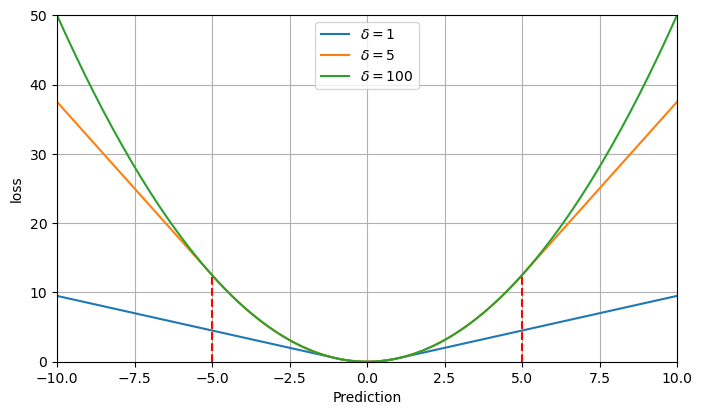

In [30]:
plt.figure(figsize=(8, 4.5))
z = np.linspace(-10 ,10, 200)
plt.plot(z, huber(0,z,1), label="$\delta=1$")
plt.plot(z, huber(0,z,5), label="$\delta=5$")
plt.plot(z, huber(0,z,100), label="$\delta=100$")

plt.plot([5,5], [0, huber(0.,5.,5.)], "r--")
plt.plot([-5,-5], [0, huber(0.,-5.,5.)], "r--")

plt.axis([-10,10,0,50])
plt.grid(True)
plt.xlabel('Prediction')
plt.ylabel('loss')
plt.legend()

plt.show()

- Âª∫Á´ãÁºñËØëËÆ≠ÁªÉÊ®°Âûã

In [31]:
input_shape = X_train.shape[1:]   # (8,)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation=keras.activations.selu,
                       kernel_initializer=keras.initializers.lecun_normal,
                       input_shape=input_shape),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss=huber,
              optimizer=optimizer,
              metrics=[keras.metrics.mean_absolute_error])

model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_val_scaled,y_val))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.6235 - mean_absolute_error: 0.9953 - val_loss: 0.2862 - val_mean_absolute_error: 0.5866
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2197 - mean_absolute_error: 0.5177 - val_loss: 0.2382 - val_mean_absolute_error: 0.5281


## ‰øùÂ≠òÂπ∂Âä†ËΩΩÂê´ÊúâËá™ÂÆö‰πâÁªÑ‰ª∂ÁöÑÊ®°Âûã Saving and Loading Models That Contain Custom Components

In [32]:
model.save("../models/custom_loss.h5")

In [33]:
# ÂΩìÂä†ËΩΩÂê´ÊúâËá™ÂÆö‰πâÂØπË±°ÁöÑÊ®°ÂûãÊó∂, ÈúÄË¶ÅÂ∞ÜÂêçÁß∞Êò†Â∞ÑÂà∞ÂØπË±°
model = keras.models.load_model("../models/custom_loss.h5",
                                custom_objects={"huber":huber})

In [34]:
model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_val_scaled, y_val))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2054 - mean_absolute_error: 0.4982 - val_loss: 0.2209 - val_mean_absolute_error: 0.5050
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.1999 - mean_absolute_error: 0.4900 - val_loss: 0.2127 - val_mean_absolute_error: 0.4986


### Ëß£ÂÜ≥ÈòàÂÄºùõø ÁöÑËÆæÁΩÆÈóÆÈ¢ò

1. ÂàõÂª∫ÂáΩÊï∞,ËØ•ÂáΩÊï∞ÂàõÂª∫Â∑≤ÈÖçÁΩÆÁöÑÊçüÂ§±ÂáΩÊï∞.

In [35]:
def create_huber(delta=1.):
    def huber(y_true, y_pred):
        error = y_true - y_pred
        MSE = tf.square(error) / 2
        MAE = (delta * tf.abs(error)) - (tf.square(delta) / 2)

        condition = tf.abs(error) <= delta

        return tf.where(condition=condition, x=MSE, y=MAE) 
    return huber

- ÂΩì‰øùÂ≠òÊ®°ÂûãÊó∂ÈòàÂÄº‰∏ç‰ºöË¢´‰øùÂ≠ò,ËøôÊÑèÂë≥ÁùÄÊØèÊ¨°Âä†ËΩΩÊ®°ÂûãÈÉΩÈúÄË¶ÅÊåáÂÆöÈòàÂÄº.

In [36]:
model = keras.models.load_model("../models/custom_loss.h5",
                                custom_objects={"huber":create_huber(delta=5.0)})

In [37]:
model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_val_scaled,y_val))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2426 - mean_absolute_error: 0.5038 - val_loss: 0.3431 - val_mean_absolute_error: 0.5047
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2323 - mean_absolute_error: 0.4962 - val_loss: 0.2694 - val_mean_absolute_error: 0.4929


2. ÈÄöËøáÂàõÂª∫`keras.losses.Loss`Á±ªÁöÑÂ≠êÁ±ª,ÂÆûÁé∞ÂÖ∂`get_config()`

In [38]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, delta=1., **kwargs):
        self.delta = delta
        super(HuberLoss, self).__init__(**kwargs)   # super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        MSE = tf.square(error) / 2
        MAE = (self.delta * tf.abs(error)) - (tf.square(self.delta) / 2)
        condition = tf.abs(error) <= self.delta
        return tf.where(condition=condition, x=MSE, y=MAE) 
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "delta":self.delta}    

- ÊûÑÈÄ†ÂáΩÊï∞Êé•Âèó` **kwargs`Âπ∂Â∞ÜÂÆÉ‰ª¨‰º†ÈÄíÁªôÁà∂Á±ªÊûÑÈÄ†ÂáΩÊï∞,ËØ•Áà∂Á±ªÊûÑÈÄ†ÂáΩÊï∞Â§ÑÁêÜÊ†áÂáÜË∂ÖÂèÇÊï∞:ÊçüÂ§±ÁöÑ`name`ÂíåÁî®‰∫éËÅöÂêàÂçï‰∏™ÂÆû‰æãÊçüÂ§±ÁöÑ`reduction`ÁÆóÊ≥ï„ÄÇÈªòËÆ§ÊÉÖÂÜµ‰∏ãÂÆÉÊòØ`sum_over_batch_size`,ËøôÊÑèÂë≥ÁùÄÊçüÂ§±Â∞ÜÊòØÂÆû‰æãÊçüÂ§±ÁöÑÊÄªÂíå,Áî±Ê†∑Êú¨Èáç(Â¶ÇÊûúÊúâ)Âä†ÊùÉ,ÂÜçÈô§‰ª•ÊâπÈáèÂ§ßÂ∞è(ËÄå‰∏çÊòØÊùÉÈáç‰πãÂíå,Âõ†Ê≠§‰∏çÊòØÊùÉÈáçÁöÑÂπ≥Âùá).
- `ca11()`ÊñπÊ≥ïËé∑ÂèñÊ†áÁ≠æÂíåÈ°∂Êµã,ËÆ°ÁÆóÊâÄÊúâÂÆû‰æãÊçüÂ§±,ÁÑ∂ÂêéÂ∞ÜÂÖ∂ËøîÂõû, 
- `get_config()`ÊñπÊ≥ïËøîÂõû‰∏Ä‰∏™Â≠óÂÖ∏,Â∞ÜÊØè‰∏™Ë∂ÖÂèÇÊï∞ÂêçÁß∞Êò†Â∞ÑÂà∞ÂÖ∂ÂÄº„ÄÇÂÆÉÈ¶ñÂÖàË∞ÉÁî®Áà∂Á±ªÁöÑ`get_config()`ÊñπÊ≥ï,ÁÑ∂ÂêéÂ∞ÜÊñ∞ÁöÑË∂ÖÂèÇÊï∞Ê∑ªÂä†Âà∞Ê≠§Â≠óÂÖ∏‰∏≠.

In [39]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation=keras.activations.selu,
                       kernel_initializer=keras.initializers.lecun_normal,
                       input_shape=input_shape),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss=HuberLoss(delta=2.),
              optimizer=optimizer,
              metrics=[keras.metrics.mean_absolute_error])

model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_val_scaled,y_val))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.7095 - mean_absolute_error: 0.8863 - val_loss: 0.3378 - val_mean_absolute_error: 0.5485
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2416 - mean_absolute_error: 0.5083 - val_loss: 0.2660 - val_mean_absolute_error: 0.5089


In [40]:
model.save("../models/custom_loss_2.h5")

- ÂΩì‰øùÂ≠òÊ®°ÂûãÊó∂,ÈòàÂÄº‰ºöÂêåÊó∂Ë¢´‰øùÂ≠ò!ÂΩì‰øùÂ≠òÊ®°ÂûãÊó∂, `Keras`‰ºöË∞ÉÁî®ÊçüÂ§±ÂÆû‰æãÁöÑ`get_config()`ÊñπÊ≥ï,Âπ∂Â∞ÜÈÖçÁΩÆ‰ª•`JSON`Ê†ºÂºè‰øùÂ≠òÂà∞`HDFSÊñá‰ª∂`‰∏≠„ÄÇ

- Âä†ËΩΩÊ®°ÂûãÊó∂,ÂÆÉÂú®`HuberLossÁ±ª`‰∏äË∞ÉÁî®`from_config()`Á±ªÊñπÊ≥ï:Ê≠§ÊñπÊ≥ïÁî±Âü∫Á±ª(Loss)ÂÆûÁé∞,Âπ∂ÂàõÂª∫ËØ•Á±ªÁöÑÂÆû‰æã,Âπ∂Â∞Ü`**config`‰º†ÈÄíÁªôÊûÑÈÄ†ÂáΩÊï∞.

In [41]:
model = keras.models.load_model("../models/custom_loss_2.h5",
                                custom_objects={"HuberLoss":HuberLoss})

In [42]:
model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_val_scaled,y_val))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2286 - mean_absolute_error: 0.4970 - val_loss: 0.2120 - val_mean_absolute_error: 0.4723
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2216 - mean_absolute_error: 0.4904 - val_loss: 0.2045 - val_mean_absolute_error: 0.4725


In [43]:
model.loss.delta

2.0

## Ëá™ÂÆö‰πâÊøÄÊ¥ªÂáΩÊï∞,ÂàùÂßãÂåñ,Ê≠£ÂàôÂåñÂíåÁ∫¶Êùü

> 1. SoftplusÂáΩÊï∞:
$$
softplus(x) = log(1+e^x)
$$
2. GlorotÂàùÂßãÂåñ:
Ëã•ÈááÁî®È´òÊñØÂàÜÂ∏ÉÊù•ÈöèÊú∫ÂàùÂßãÂåñÂèÇÊï∞ÔºåËøûÊé•ÊùÉÈáç $ùë§(ùëô)$ ÂèØ‰ª•Êåâ $ùí© (0, \frac{2}{M_{l-1}\  + M_{l}} )$
ÁöÑÂàÜÂ∏ÉËøõË°åÂàùÂßãÂåñ.
3. $\ell_1$ Ê≠£ÂàôÂåñ:
$$
C||w||_1
$$

In [44]:
# ~keras.activations.softplus()
def my_softplus(x):
    return tf.math.log(1.0 + tf.exp(x))

# ~keras.initializers.glorot_normal()
def my_glorot_normal(shape, dtype=tf.float32):
    # Ê†áÂáÜÂ∑Æ
    stddev = tf.sqrt(2. / (shape[0]+shape[1]))
    return tf.random.normal(shape=shape, stddev=stddev, dtype=dtype)

# ~keras.regularizers.l1(0.01)
def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01*weights))

# ~keras.constraints.non_neg()  Á°Æ‰øùÊùÉÈáçÂùá‰∏∫Ê≠£
def my_positive_weight(weights):
    return tf.where(condition=weights<0.,
                    x=tf.zeros_like(weights),   # ÁîüÊàêÂÖ®0Êï∞ÁªÑ
                    y=weights)

In [45]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation=keras.activations.selu,
                       kernel_initializer=keras.initializers.lecun_normal,
                       input_shape=input_shape),
    keras.layers.Dense(1,activation=my_softplus,
                       kernel_initializer=my_glorot_normal,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weight)
])

optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="mse",
              optimizer=optimizer,
              metrics=[keras.metrics.mean_absolute_error])

model.fit(X_train_scaled, y_train,
          epochs=4,
          validation_data=(X_val_scaled,y_val))

Epoch 1/4
363/363 [==============================] - 1s 2ms/step - loss: 1.3809 - mean_absolute_error: 0.8429 - val_loss: inf - val_mean_absolute_error: inf
Epoch 2/4
363/363 [==============================] - 1s 1ms/step - loss: 0.6669 - mean_absolute_error: 0.5528 - val_loss: 2.7498 - val_mean_absolute_error: 0.5489
Epoch 3/4
363/363 [==============================] - 1s 2ms/step - loss: 0.5601 - mean_absolute_error: 0.5104 - val_loss: 1.8447 - val_mean_absolute_error: 0.5116
Epoch 4/4
363/363 [==============================] - 1s 1ms/step - loss: 0.5204 - mean_absolute_error: 0.4949 - val_loss: 1.3956 - val_mean_absolute_error: 0.4966


- ‰øùÂ≠òÂíåÂä†ËΩΩÊ®°Âûã

In [46]:
model.save("../models/custom_loss_3.h5")

In [47]:
model = keras.models.load_model("../models/custom_loss_3.h5",
                                custom_objects={
                                    'my_softplus': my_softplus,
                                    'my_glorot_normal':my_glorot_normal,
                                    'my_l1_regularizer':my_l1_regularizer,
                                    'my_positive_weight':my_positive_weight
                                })

- ÂØπ‰∫éÂáΩÊï∞ÈúÄË¶Å‰∏éÊ®°Âûã‰∏ÄËµ∑‰øùÂ≠òÁöÑË∂ÖÂèÇÊï∞,ÈúÄË¶ÅÁªßÊâøÈÄÇÂΩìÁöÑÁ±ª.

In [48]:
# def my_l1_regularizer(weights):
#     return tf.reduce_sum(tf.abs(0.01*weights))


class my_l1_reg(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor*weights))
    def get_config(self):
        return {"factor":self.factor}

Ê≥®ÊÑè:
1. ‰∏∫**ÊçüÂ§±ÂáΩÊï∞,Â±Ç(ÂåÖÊã¨ÊøÄÊ¥ªÂáΩÊï∞),Ê®°Âûã**ÂÆûÁé∞**`call()`**ÊñπÊ≥ï.
2. ‰∏∫**Ê≠£ÂàôÂåñ,ÂàùÂßãÂåñ,Á∫¶Êùü**ÂÆûÁé∞**`__call()__`**ÊñπÊ≥ï.

## Ëá™ÂÆö‰πâÊåáÊ†á Custom Metrics

Âú®Â§ßÂ§öÊï∞ÊÉÖÂÜµ‰∏ã,ÂÆö‰πâ‰∏Ä‰∏™Ëá™ÂÆö‰πâÊåáÊ†áÂáΩÊï∞‰∏éÂÆö‰πâ‰∏Ä‰∏™Ëá™ÂÆö‰πâÊçüÂ§±ÂáΩÊï∞**ÂÆåÂÖ®Áõ∏Âêå**.

In [49]:
# ‰ª•ÂâçÈù¢ÁöÑËá™ÂÆö‰πâÊçüÂ§±ÂáΩÊï∞Huber()‰Ωú‰∏∫ÊåáÊ†áÂáΩÊï∞
model = keras.models.Sequential([
    keras.layers.Dense(30, activation=keras.activations.selu,
                       kernel_initializer=keras.initializers.lecun_normal,
                       input_shape=input_shape),
    keras.layers.Dense(1)
])

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=optimizer,
              metrics=[create_huber(delta=2.)])

model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_val_scaled,y_val))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.8157 - huber: 0.3689 - val_loss: 0.4798 - val_huber: 0.2252
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.4678 - huber: 0.2292 - val_loss: 0.9202 - val_huber: 0.2418


### ÊµÅÂºèÂ∫¶Èáè Streaming metrics

ÂØπ‰∫éËÆ≠ÁªÉÊúüÈó¥ÁöÑÊØè‰∏ÄÊâπÊ¨°, `Keras`ÈÉΩ‰ºöËÆ°ÁÆóËØ•ÊåáÊ†áÂπ∂Ë∑üË∏™**Ëá™ËΩÆÊ¨°ÂºÄÂßã‰ª•Êù•ÁöÑÂùáÂÄº**„ÄÇ

- ‰ª•‰∫åÂÖÉÂàÜÁ±ªÂô®ÁöÑ`Á≤æÁ°ÆÁéá`‰∏∫‰æã.
$$
P = \frac{TP}{TP+FP}
$$

    ÂÅáËÆæËØ•Ê®°ÂûãÂú®Á¨¨‰∏ÄÊâπÊ¨°‰∏≠ÂÅöÂá∫‰∫Ü5‰∏™Ê≠£È¢ÑÊµã,ÂÖ∂‰∏≠4‰∏™ÊòØÊ≠£Á°ÆÁöÑ,Âç≥80%ÁöÑÁ≤æÂ∫¶„ÄÇÁÑ∂ÂêéÂÅáËÆæËØ•Ê®°ÂûãÂú®Á¨¨‰∫åÊâπÊ¨°‰∏≠ÂÅöÂá∫‰∫Ü3‰∏™Ê≠£È¢ÑÊµã,‰ΩÜÂÆÉ‰ª¨ÈÉΩÊòØ‰∏çÊ≠£Á°ÆÁöÑ,Âç≥Á¨¨‰∫åÊâπÊ¨°ÁöÑÁ≤æÂ∫¶‰∏∫0%„ÄÇÂ¶ÇÊûú‰ªÖËÆ°ÁÆóËøô‰∏§‰∏™Á≤æÂ∫¶ÁöÑÂùáÂÄº,ÂàôÂèØ‰ª•ÂæóÂà∞40%„ÄÇÂÆûÈôÖ‰∏ä,Âú®8‰∏™Ê≠£È¢ÑÊµã(5+3)‰∏≠,ÊÄªÂÖ±Êúâ4‰∏™ÁúüÊ≠£(4+0),Âõ†Ê≠§ÊÄª‰ΩìÁ≤æÂ∫¶‰∏∫ 50%,ËÄå‰∏çÊòØ40%„ÄÇ
    
    Êàë‰ª¨ÈúÄË¶ÅÁöÑÊòØ‰∏Ä‰∏™ÂØπË±°,ËØ•ÂØπË±°ÂèØ‰ª•Ë∑üË∏™ÁúüÊ≠£ÁöÑÊï∞ÈáèÂíåÂÅáÊ≠£ÁöÑÊï∞ÈáèÂπ∂‰∏îÂèØ‰ª•Âú®ËØ∑Ê±ÇÊó∂ËÆ°ÁÆóÂÖ∂ÊØîÁéá„ÄÇ

In [50]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [51]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

- ÊâãÂä®ÂàõÂª∫ÊµÅÂºèÂ∫¶Èáè-ÊñπÊ≥ï1

    Ë∑üË∏™HuberÊÄªÊçüÂ§±, ÂΩìË¶ÅÊ±ÇËøîÂõûÁªìÊûúÊó∂ËøîÂõûÊØîÁéá,ÂæóÂà∞Âπ≥ÂùáHuberÊçüÂ§±

In [52]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, delta=1., **kwargs):
        super(HuberMetric, self).__init__(**kwargs)
        self.delta = delta
        self.Huber = create_huber(delta)
        self.total = self.add_weight("total", initializer=tf.zeros)
        self.count = self.add_weight("count", initializer=tf.zeros)

    def update_state(self, y_true, y_pred, sample_weight=None):
        metrics = self.Huber(y_true, y_pred)
        # ÂØπ‰∫éÂèòÈáèÂ∫îËØ•‰ΩøÁî®assign()ÊñπÊ≥ï
        self.total.assign_add(tf.reduce_sum(metrics))
        self.count.assign_add(tf.cast(tf.size(y_true), dtype=tf.float32))  # int -> float32

    def result(self):
        return self.total / self.count

    def get_config(self):
        base_config = super(HuberMetric, self).get_config()
        return {**base_config, 'delta': self.delta}


1. `add_weight()`ÂàõÂª∫Áî®‰∫éË∑üË∏™Â§ö‰∏™ÊâπÊ¨°ÁöÑÂ∫¶ÈáèÁä∂ÊÄÅÊâÄÈúÄÁöÑÂèòÈáè.
2. ÂΩì‰Ω†‰ΩøÁî®Â∫¶Èáè‰Ωú‰∏∫ÂáΩÊï∞Êó∂,È¶ñÂÖàË∞ÉÁî®`update_state()`,ÁÑ∂ÂêéË∞ÉÁî®`result()`,Âπ∂ËøîÂõûËæìÂá∫.
3. Êüê‰∫õÊåáÊ†á(Â¶ÇÁ≤æÁ°ÆÂ∫¶)‰∏çËÉΩÁÆÄÂçïÁöÑÊåâÊâπÊ¨°Âπ≥Âùá,ËøôÁßçÊÉÖÂÜµ‰∏ãÂ∫îËØ•‰ΩøÁî®ÊµÅÂºèÂ∫¶Èáè.

- ÊµãËØï

In [53]:
y_true = tf.constant([
    [0.],
    [5.]
])
y_pred = tf.constant([
    [1.],
    [9.25]
])

$$
L_{\delta}(y, f(x))=\left\{\begin{array}{cc}
\frac{1}{2}(y-f(x))^{2} & |y-f(x)| \leq \delta \\
\delta|y-f(x)|-\frac{1}{2} \delta^{2} & \text { otherwise }
\end{array}\right.\\
$$

Ëß£:
$$
error_1 = |\text{y_true}_1- \text{y_pred}_1| = |0-1|=1 < \delta \\
error_2 = |5-9.25|=4.25 > \delta \\
total_1 = L_{\delta=2.}(error_1)=\frac{1}{2}(error_1)^{2}= \frac{1}{2}  \\
total_2 = L_{\delta=2.}(error_2)=\delta|error|-\frac{1}{2} \delta^{2}=8.5 - 2 = 6.5 \\
total = total_1+total_2 = 7 \\
count = 2 \\
result = \frac{7}{2} = 3.5
$$

In [54]:
test = HuberMetric(delta=2.)
test(y_true, y_pred)
test.result()

<tf.Tensor: shape=(), dtype=float32, numpy=3.5>

In [55]:
test.variables    # Êü•ÁúãÂèòÈáè

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=7.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=2.0>]

In [56]:
test.reset_states()  # ÈáçÁΩÆÂèòÈáè
test.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

- Âú®Ê®°Âûã‰∏äËøõË°åÊµãËØï

In [57]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation=keras.activations.selu,
                       kernel_initializer=keras.initializers.lecun_normal,
                       input_shape=input_shape),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss=create_huber(delta=2.),
              metrics=[HuberMetric(delta=2.)])
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32),  # float64->float32
          epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.3016 - huber_metric_1: 0.3016
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2305 - huber_metric_1: 0.2305


In [58]:
model.save("../models/custom_metrics.h5")

model = keras.models.load_model("../models/custom_metrics.h5",
                                custom_objects={
                                    "huber":create_huber(delta=1.),
                                    "HuberMetric":HuberMetric           # Â∑≤‰øùÂ≠òÈòàÂÄº
                                })
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32),  # float64->float32
          epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.1828 - huber_metric_1: 0.2066
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1760 - huber_metric_1: 0.1978


In [59]:
model.metrics[-1].delta    # Ê≥®ÊÑèÊòØÂú®[-1]ËÆøÈóÆHuberMetric

2.0

- ÊâãÂä®ÂàõÂª∫ÊµÅÂºèÂ∫¶Èáè-ÊñπÊ≥ï2

In [60]:
class HuberMetric(keras.metrics.Mean):
    def __init__(self, delta=1., name='HuberMetric', dtype=None, **kwargs):
        self.delta = delta
        self.Huber = create_huber(delta)
        super(HuberMetric, self).__init__(name=name, dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        metrics = self.Huber(y_true, y_pred)
        super(HuberMetric, self).update_state(metrics, sample_weight)

    def get_config(self):
        base_config = super(HuberMetric, self).get_config()
        return {**base_config, 'delta': self.delta}

In [61]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation=keras.activations.selu,
                       kernel_initializer=keras.initializers.lecun_normal,
                       input_shape=input_shape),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss=create_huber(delta=2.),
              metrics=[HuberMetric(delta=2.)])

In [62]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32),
                    epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.1643 - HuberMetric: 0.3337
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1125 - HuberMetric: 0.2264


In [63]:
history.history["loss"][0], history.history["HuberMetric"][0] * sample_weight.mean()

(0.1643051952123642, 0.16561538026952183)

In [64]:
model.save("../models/custom_metrics_v2.h5")

model = keras.models.load_model("../models/custom_metrics_v2.h5",
                                custom_objects={
                                    "huber":create_huber(delta=1.),
                                    "HuberMetric":HuberMetric           # Â∑≤‰øùÂ≠òÈòàÂÄº
                                })
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32),  # float64->float32
          epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.1900 - HuberMetric: 0.2179
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1797 - HuberMetric: 0.2040


In [65]:
model.metrics[-1].delta    # Ê≥®ÊÑèÊòØÂú®[-1]ËÆøÈóÆHuberMetric

2.0

## Ëá™ÂÆö‰πâÂ±Ç  Custom Layers

Â¶ÇÊûúÊÉ≥Ë¶ÅÊûÑÂª∫‰∏Ä‰∏™ÂåÖÂê´Áã¨ÁâπÂ±ÇÁöÑÊû∂ÊûÑ,ËÄå`Tensorflow`Ê≤°Êúâ‰∏∫ÂÖ∂Êèê‰æõÈªòËÆ§ÂÆûÁé∞ÁöÑÊÉÖÂÜµ‰∏ã,‰Ω†Â∞ÜÈúÄË¶ÅÂàõÂª∫‰∏Ä‰∏™Ëá™ÂÆö‰πâÂ±Ç„ÄÇÊàñËÄÖ‰Ω†ÂèØËÉΩÂè™ÊòØÊÉ≥ÊûÑÂª∫‰∏Ä‰∏™ÈáçÂ§çÁöÑÊû∂ÊûÑ,ÂÖ∂‰∏≠ÂåÖÂê´ÈáçÂ§çÂ§öÊ¨°ÁöÑÁõ∏ÂêåÂ±ÇÂùó,Âõ†Ê≠§Â∞ÜÊØè‰∏™Â±ÇÂùóËßÜ‰∏∫‰∏Ä‰∏™Â±Ç‰ºöÂæàÊñπ‰æø„ÄÇ

###  LambdaÂ±Ç

ÂØπ‰∫éÂàõÂª∫Êó†ÊùÉÈáçÁöÑÂ±Ç,Â¶Ç`Flatten`,`ReLU`Á≠âÁöÑÁÆÄÂçïÂ∫îÁî®,ÂèØ‰ª•‰ΩøÁî®<mark>ÂåøÂêçÂáΩÊï∞Â±ÇLambda<mark>

In [66]:
# ÂØπÂ±ÇÁöÑËæìÂÖ•Â∫îÁî®ÊåáÊï∞ÂáΩÊï∞
exp_layer = keras.layers.Lambda(lambda x:tf.exp(x))

exp_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787948, 1.        , 2.7182817 ], dtype=float32)>

ÂΩìË¶ÅÈ¢ÑÊµãÁöÑÂÄºÂÖ∑ÊúâÈùûÂ∏∏‰∏çÂêåÁöÑÊ†áÂ∫¶(‰æãÂ¶Ç0.01,10,1000)Êó∂,ÊúâÊó∂‰ºöÂú®ÂõûÂΩíÊ®°ÂûãÁöÑËæìÂá∫Â±Ç‰∏≠‰ΩøÁî®ÊåáÊï∞Â±Ç.

In [67]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation=keras.activations.relu,
                       input_shape=input_shape),
    keras.layers.Dense(1),
    exp_layer
])

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              loss=keras.losses.mean_absolute_error,)

model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_val_scaled, y_val))

model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 1s 1ms/step - loss: 0.8267 - val_loss: 0.4922
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: 0.4786 - val_loss: 0.4448
Epoch 3/5
363/363 [==============================] - 0s 1ms/step - loss: 0.4559 - val_loss: 0.4266
Epoch 4/5
363/363 [==============================] - 0s 1ms/step - loss: 0.4470 - val_loss: 0.4236
Epoch 5/5
162/162 [==============================] - 0s 671us/step - loss: 0.4323


0.432257741689682

### Ëá™ÂÆö‰πâÂ±Ç

ÂØπ‰∫éÂ∏¶ÊúâËÆ≠ÁªÉÂèÇÊï∞ÁöÑÔºöÊØîÂ¶Ç`DenseÂ±Ç`„ÄÅ`Conv2DÂ±Ç`ÔºåÁ≠âÁ≠âÔºåÊàë‰ª¨Âú®ËÆ≠ÁªÉÁöÑËøáÁ®ã‰∏≠ÈúÄË¶ÅËÆ≠ÁªÉÂ±ÇÁöÑÊùÉÈáçÂíåÂÅèÁΩÆÈ°π

In [68]:
class MyDense(keras.layers.Layer):
    def __init__(self, n_neurons, activation=None, **kwargs):
        super(MyDense, self).__init__(**kwargs)
        self.n_neurons = n_neurons
        self.activation = keras.activations.get(activation)  # Êé•ÂèóÂáΩÊï∞ÊàñÊ†áÂáÜÂ≠óÁ¨¶‰∏≤("relu")

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.n_neurons],
            initializer=keras.initializers.glorot_normal)
        self.bias = self.add_weight(
            name="bias", shape=[self.n_neurons],
            initializer=tf.zeros)
        # ÂøÖÈ°ªÂú®ÊúÄÂêéË∞ÉÁî®Áà∂Á±ªÁöÑbuild()
        super(MyDense, self).build(batch_input_shape)

    def call(self, X):
        # ËÆ°ÁÆóËæìÂÖ•X‰∏éÂ±ÇÂÜÖÊ†∏ÁöÑÁü©Èòµ‰πòÁßØ,Ê∑ªÂä†ÂÅèÁΩÆÂêëÈáè,Âπ∂ÂØπÁªìÊûúÂ∫îÁî®ÊøÄÊ¥ªÂáΩÊï∞,‰ªéËÄåËé∑ÂæóÂ±ÇÁöÑËæìÂá∫„ÄÇ
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        # ‰ªÖËøîÂõûËØ•Â±ÇËæìÂá∫ÁöÑÂΩ¢Áä∂:ÊúÄÂêé‰∏Ä‰∏™Áª¥Â∫¶Ë¢´ÊõøÊç¢‰∏∫ËØ•Â±Ç‰∏≠Á•ûÁªèÂÖÉÊï∞Èáè
        # as_list()ËΩ¨Êç¢‰∏∫pythonÂàóË°®
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.n_neurons])

    def get_config(self):
        base_config = super(MyDense, self).get_config()
        return {**base_config, "n_neurons": self.n_neurons, 
                "activation": keras.activations.serialize(self.activation)}

- `bui1d()`: ÈÄöËøá‰∏∫ÊØè‰∏™ÊùÉÈáçË∞ÉÁî®`add_weight()`Êù•ÂàõÂª∫Â±ÇÁöÑÂèòÈáè„ÄÇÈ¶ñÊ¨°‰ΩøÁî®ËØ•Â±ÇÊó∂,Â∞ÜË∞ÉÁî®`build()`„ÄÇÂú®ÊñπÊ≥ïÁöÑÊúÄÂêé(Âπ∂‰∏î‰ªÖÂú®ÊúÄÂêé),‰Ω†ÂøÖÈ°ªË∞ÉÁî®Áà∂Á±ªÁöÑbui1d()ÊñπÊ≥ï:ËøôÂëäËØâ KerasËøô‰∏ÄÂ±ÇË¢´ÊûÑÂª∫‰∫Ü(ÂÆÉÂè™ÊòØËÆæÁΩÆ‰∫Üself.built=True)„ÄÇ
- Âú®`tf.keras`‰∏≠,ÂΩ¢Áä∂ÊòØ`tf.TensorshapeÁ±ª`ÁöÑÂÆû‰æã,‰Ω†ÂèØ‰ª•‰ΩøÁî®`as_list()`Â∞ÜÂÖ∂ËΩ¨Êç¢‰∏∫ PythonÂàóË°®„ÄÇ
- `get_config()`ÊñπÊ≥ïÂ∞±ÂÉè‰ª•ÂâçÁöÑËá™ÂÆö‰πâÁ±ª‰∏≠‰∏ÄÊ†∑„ÄÇËØ∑Ê≥®ÊÑèÊàë‰ª¨ÈÄöËøáË∞ÉÁî® `keras.activations.serialize()`‰øùÂ≠òÊøÄÊ¥ªÂáΩÊï∞ÁöÑÂÆåÊï¥ÈÖçÁΩÆ„ÄÇ

In [69]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

optimizer = keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss=keras.losses.mean_squared_error)
model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_val_scaled,y_val))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.6651 - val_loss: 0.5982
Epoch 2/2
162/162 [==============================] - 0s 723us/step - loss: 0.4121


0.41214120388031006

In [70]:
model.save("../models/custom_layers.h5")

model = keras.models.load_model("../models/custom_layers.h5",
                                custom_objects={
                                    "MyDense":MyDense,
                                })
model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_val_scaled,y_val))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.4366 - val_loss: 0.3798
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.3958 - val_loss: 1.0223


### Â§öËæìÂÖ•Â§öËæìÂá∫Â±Ç

ÂÅáËÆæËøô‰∏™Â±ÇÈúÄË¶Å‰∏§‰∏™ËæìÂÖ•Âπ∂ËøîÂõû‰∏§‰∏™ËæìÂá∫`call()`Â∫îËøîÂõûËæìÂá∫ÂàóË°®,`compute_output_shape()`Â∫îËøîÂõûÊâπÂ§ÑÁêÜËæìÂá∫ÁöÑÂΩ¢Áä∂ÂàóË°®.

In [71]:
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        print("X1.shape: ", X1.shape ," X2.shape: ", X2.shape) # Debugging of custom layer
        return X1 + X2, X1 * X2

    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]

Âè™ËÉΩ‰ΩøÁî®ÂáΩÊï∞ÂºèÂíåÂ≠êÁ±ªAPI,‰∏çËÉΩ‰ΩøÁî®È°∫Â∫èAPI.Ê≥®ÊÑè:call()ÊñπÊ≥ïÊé•Êî∂Á¨¶Âè∑ËæìÂÖ•,ÂÖ∂ÂΩ¢Áä∂‰ªÖÈÉ®ÂàÜÊåáÂÆö(Âõ†Ê≠§‰∏Ä‰∏™Áª¥Â∫¶‰∏∫None)
    
‰ΩøÁî®‰ª•‰∏ãÊñπÊ≥ïË∞ÉÁî®Ëá™ÂÆö‰πâÂ±Ç:

In [72]:
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

X1.shape:  (None, 2)  X2.shape:  (None, 2)


- ÂÆû‰æãÊµãËØï
    1. È¶ñÂÖàÂ∞ÜÊØè‰∏™Êï∞ÊçÆÈõÜÁöÑËæìÂÖ•(8‰∏™ÁâπÂæÅ)ÂàÜÊàê‰∏§ÈÉ®ÂàÜÔºåÊØè‰∏™ÈÉ®ÂàÜÊúâÂõõ‰∏™ÁâπÂæÅ

In [73]:
def spilt_feature(data):
    feature_count = data.shape[-1]    # 8
    spilt_half = feature_count // 2  
    return data[:, :spilt_half], data[:, spilt_half:]


X_train_scaled_A, X_train_scaled_B = spilt_feature(X_train_scaled)
X_val_scaled_A, X_val_scaled_B = spilt_feature(X_val_scaled)
X_test_scaled_A, X_test_scaled_B = spilt_feature(X_test_scaled)

X_train_scaled_A.shape, X_train_scaled_B.shape

((11610, 4), (11610, 4))

In [74]:
# ÊµãËØï‰∏ãËæìÂÖ•ÁöÑÂΩ¢Áä∂
outputs1, outputs2 = MyMultiLayer()([X_train_scaled_A, X_train_scaled_B])

X1.shape:  (11610, 4)  X2.shape:  (11610, 4)


2. ‰ΩøÁî®ÂáΩÊï∞ÂºèAPIÊûÑÂª∫Ê®°Âûã

In [75]:
keras.backend.clear_session()

In [76]:
input_A = keras.layers.Input(shape=X_train_scaled_A.shape[-1])
input_B = keras.layers.Input(shape=X_train_scaled_B.shape[-1])

Multi_1, Multi_2 = MyMultiLayer()([input_A, input_B])
hidden_1 = keras.layers.Dense(30, activation=keras.activations.relu)(Multi_1)
hidden_2 = keras.layers.Dense(30, activation=keras.activations.relu)(Multi_2)

concat = keras.layers.Concatenate()([hidden_1, hidden_2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

X1.shape:  (None, 4)  X2.shape:  (None, 4)


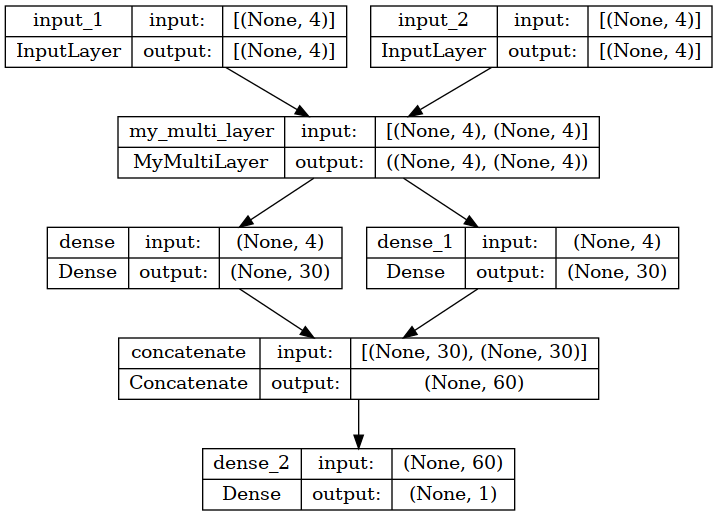

In [77]:
keras.utils.plot_model(model, '../models/Multi_custom_layers.png', show_shapes=True)

In [78]:
optimizer = keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss=keras.losses.mean_squared_error)
model.fit([X_train_scaled_A, X_train_scaled_B], y_train,
          epochs=2,
          validation_data=([X_val_scaled_A, X_val_scaled_B],y_val))
model.evaluate([X_test_scaled_A, X_test_scaled_B], y_test)

Epoch 1/2
X1.shape:  (None, 4)  X2.shape:  (None, 4)
X1.shape:  (None, 4)  X2.shape:  (None, 4)
363/363 [==============================] - 1s 2ms/step - loss: 1.1911 - val_loss: 69.6530
Epoch 2/2
162/162 [==============================] - 0s 720us/step - loss: 0.7968


0.7968454957008362

In [79]:
model.save("../models/Multi_custom_layers.h5")

model = keras.models.load_model("../models/Multi_custom_layers.h5",
                                custom_objects={"MyMultiLayer":MyMultiLayer})
model.fit([X_train_scaled_A, X_train_scaled_B], y_train,
          epochs=2,
          validation_data=([X_val_scaled_A, X_val_scaled_B],y_val))

X1.shape:  (None, 4)  X2.shape:  (None, 4)
Epoch 1/2
X1.shape:  (None, 4)  X2.shape:  (None, 4)
363/363 [==============================] - 1s 2ms/step - loss: 0.9768 - val_loss: 36.6951
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 1.6640 - val_loss: 199.6380


### ÊµãËØï‰∏éËÆ≠ÁªÉÊúüÈó¥Ë°å‰∏∫‰∏çÂêåÁöÑÂ±Ç

Âú®ËÆ≠ÁªÉÂíåÊµãËØïÈò∂ÊÆµË°å‰∏∫Â∑ÆË∑ùËæÉÂ§ßÁöÑÂ±ÇÔºåÂ∏∏Áî®ÁöÑÊúâÔºö`DrououtÂ±Ç`„ÄÅ`BatchNormalizationÂ±Ç`,ÂàôÂøÖÈ°ªÂ∞ÜËÆ≠ÁªÉÂèÇÊï∞Ê∑ªÂä†Âà∞`call()`Âπ∂‰ΩøÁî®Ê≠§ÂèÇÊï∞Êù•ÂÜ≥ÂÆöË¶ÅÂÅö‰ªÄ‰πà.

‰ª•Âú®ËÆ≠ÁªÉÊúüÈó¥Ê∑ªÂä†È´òÊñØÂô™Èü≥,‰ΩÜÂú®ÊµãËØïÊúüÈó¥‰∏çÊâßË°å‰ªª‰ΩïÊìç‰ΩúÁöÑÂ±Ç‰∏∫‰æã:

In [80]:
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super(AddGaussianNoise, self).__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(shape=tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_size):
        return batch_input_size

    def get_config(self):
        base_config = super(AddGaussianNoise, self).get_config()
        return {**base_config, "stddev": self.stddev}

In [81]:
model = keras.models.Sequential([
    AddGaussianNoise(stddev=1.),
    keras.layers.Dense(30, activation=keras.activations.selu,
                       kernel_initializer=keras.initializers.lecun_normal,
                       input_shape=input_shape),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss=keras.losses.mean_squared_error)
model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_val_scaled,y_val))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 1.2363 - val_loss: 1.1476
Epoch 2/2
162/162 [==============================] - 0s 772us/step - loss: 0.6875


0.6874946355819702

In [82]:
model.save("../models/GaussianNoise_custom_layers.h5")

model = keras.models.load_model("../models/GaussianNoise_custom_layers.h5",
                                custom_objects={"AddGaussianNoise":AddGaussianNoise})
model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_val_scaled,y_val))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.9963 - val_loss: 0.8086
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.9926 - val_loss: 3.2318


## Ëá™ÂÆö‰πâÊ®°Âûã Custom Models

Ëá™ÂÆö‰πâ‰ª•‰∏ãÊ®°Âûã:ÂÖ∑ÊúâËá™ÂÆö‰πâ`ÊÆãÂ∑ÆÁΩëÁªúResidualBlockÂ±Ç`(ÂåÖÊã¨Ë∑≥ËøáËøûÊé•)ÁöÑ‰ªªÊÑèÊ®°Âûã

<img src="../images/other/12-2.png" width="400">

ËæìÂÖ•ÁªèËøáÁ¨¨‰∏Ä‰∏™ÂØÜÈõÜÂ±Ç,ÁÑ∂ÂêéÁªèËøáÁî±‰∏§‰∏™ÂØÜÈõÜÂ±ÇÁªÑÊàêÁöÑÊÆãÂ∑ÆÂùóÂπ∂ÊâßË°åÂä†Ê≥ïËøêÁÆó,ÁÑ∂ÂêéÁªèËøáÁõ∏ÂêåÁöÑÊÆãÂ∑ÆÂùó3Ê¨°ÊàñËÄÖÊõ¥Â§öÊ¨°,ÁÑ∂ÂêéÈÄöËøáÁ¨¨‰∫å‰∏™ÊÆãÂ∑ÆÂùó,ÊúÄÁªàÁªìÊûúÈÄöËøáÂØÜÈõÜËæìÂá∫Â±Ç„ÄÇ

Ë¶ÅÂÆûÁé∞Ê≠§Ê®°Âûã,ÊúÄÂ•ΩÈ¶ñÂÖàÂàõÂª∫‰∏Ä‰∏™`ResidualblockÂ±Ç`,Âõ†‰∏∫Êàë‰ª¨Â∞ÜÂàõÂª∫Âá†‰∏™Áõ∏ÂêåÁöÑÂùó,Âπ∂‰∏îÊàë‰ª¨ÂèØËÉΩÊÉ≥Âú®Âè¶‰∏Ä‰∏™Ê®°Âûã‰∏≠ÈáçÁî®ÂÆÉ.

In [83]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super(ResidualBlock, self).__init__(**kwargs)
        self.hidden = [keras.layers.Dense(units=n_neurons, activation=keras.activations.elu,
                                          kernel_initializer=keras.initializers.he_normal)
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return Z + inputs

### ‰ΩøÁî®Â≠êÁ±ªAPIÂÆö‰πâÊ®°Âûã

In [84]:
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super(ResidualRegressor, self).__init__(**kwargs)
        self.hidden = keras.layers.Dense(30, activation=keras.activations.elu,
                                         kernel_initializer=keras.initializers.he_normal)
        self.ResidualBlock_1 = ResidualBlock(n_layers=2, n_neurons=30)
        self.ResidualBlock_2 = ResidualBlock(n_layers=2, n_neurons=30)
        self.output_dim = output_dim
        self.outputLayer = keras.layers.Dense(self.output_dim)

    def call(self, inputs):
        Z = self.hidden(inputs)
        for _ in range(4):  # ÊâßË°å‰∏ÄÊ¨°ÂêéÂÜçÂæ™ÁéØ3Ê¨°
            Z = self.ResidualBlock_1(Z)
        Z = self.ResidualBlock_2(Z)
        out = self.outputLayer(Z)
        return out

In [85]:
model = ResidualRegressor(output_dim=1)

optimizer = keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss=keras.losses.mean_squared_error)
history = model.fit(X_train_scaled, y_train,
                    epochs=5,
                    validation_data=(X_val_scaled,y_val))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 2s 3ms/step - loss: 2.6567 - val_loss: 1.8667
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5516 - val_loss: 2.4287
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5190 - val_loss: 1.5939
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4034 - val_loss: 70.7363
Epoch 5/5
162/162 [==============================] - 0s 793us/step - loss: 0.7357


0.7356653213500977

- ‰øùÂ≠òÂä†ËΩΩÊ®°Âûã

In [86]:
model.save("../models/custom_model.ckpt")   # tensorflowÊ®°ÂûãÊ†ºÂºè!

model = keras.models.load_model("../models/custom_model.ckpt")
history = model.fit(X_train_scaled, y_train,
                    epochs=5,
                    validation_data=(X_val_scaled,y_val))
model.evaluate(X_test_scaled, y_test)

INFO:tensorflow:Assets written to: ../models/custom_model.ckpt/assets


INFO:tensorflow:Assets written to: ../models/custom_model.ckpt/assets


Epoch 1/5
363/363 [==============================] - 2s 3ms/step - loss: 0.6619 - val_loss: 4.2729
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 1.3827 - val_loss: 0.4091
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3691 - val_loss: 3.2177
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3854 - val_loss: 7.1508
Epoch 5/5
162/162 [==============================] - 0s 822us/step - loss: 6.2286


6.2286176681518555

###   ‰ΩøÁî®È°∫Â∫èAPIÂÆö‰πâÊ®°Âûã

In [87]:
block_1 = ResidualBlock(n_layers=2, n_neurons=30)
block_2 = ResidualBlock(n_layers=2, n_neurons=30)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation=keras.activations.elu,
                       kernel_initializer=keras.initializers.he_normal),
    block_1, block_1, block_1, block_1,
    block_2,
    keras.layers.Dense(1)
])

In [88]:
optimizer = keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss=keras.losses.mean_squared_error)
history = model.fit(X_train_scaled, y_train,
                    epochs=5,
                    validation_data=(X_val_scaled,y_val))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 2s 2ms/step - loss: 0.8625 - val_loss: 209.5749
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 1.7061 - val_loss: 3.7343
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4090 - val_loss: 10.7405
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 1.0880 - val_loss: 69.9045
Epoch 5/5
162/162 [==============================] - 0s 719us/step - loss: 0.4230


0.42303186655044556

## Âü∫‰∫éÊ®°ÂûãÂÜÖÈÉ®ÁöÑÊçüÂ§±‰∏éÊåáÊ†á Losses and Metrics Based on Model Internals 

ÊúâÊó∂ÂÄôÊàë‰ª¨ÂèØËÉΩË¶ÅÊ†πÊçÆÊ®°ÂûãÂÜÖÈÉ®,Â¶ÇÊùÉÈáçÊàñÈöêËóèÂ±ÇÁöÑÊøÄÊ¥ªÊù•ÂÆö‰πâÊçüÂ§±,ËøôÂØπ‰∫éËøõË°åÊ≠£ÂàôÂåñÊàñÁõëËßÜÊ®°ÂûãÂÜÖÈÉ®ÁöÑÊüê‰∫õÊñπÈù¢ÂèØËÉΩÂæàÊúâÁî®.
Ë¶ÅÂü∫‰∫éÊ®°ÂûãÂÜÖÈÉ®ÂÆö‰πâËá™ÂÆö‰πâÊçüÂ§±,Ê†πÊçÆÊâÄÈúÄÊ®°ÂûãÁöÑ‰ªª‰ΩïÈÉ®ÂàÜËøõË°åËÆ°ÁÆó,ÁÑ∂ÂêéÂ∞ÜÁªìÊûú‰º†ÈÄíÁªô`add_loss()`.

‰æã: ÊûÑÂª∫‰∏Ä‰∏™Ëá™ÂÆö‰πâÂõûÂΩíMLPÊ®°Âûã,ËØ•Ê®°ÂûãÁî±5‰∏™ÈöêËóèÂ±ÇÂíå‰∏Ä‰∏™ËæìÂá∫Â±ÇÁöÑÂ†ÜÊ†àÁªÑÊàê„ÄÇÂú®‰∏äÈÉ®ÈöêËóèÂ±ÇÁöÑÈ°∂ÈÉ®Êúâ`ËæÖÂä©ËæìÂá∫`.

‰∏éËØ•ËæÖÂä©ËæìÂá∫Áõ∏ÂÖ≥ÁöÑÊçüÂ§±Áß∞‰∏∫`ÈáçÂª∫ÊçüÂ§±`:ÂÆÉÊòØÈáçÂª∫‰∏éËæìÂÖ•‰πãÈó¥ÁöÑÂùáÊñπÂ∑Æ„ÄÇÈÄöËøáÂ∞ÜËøôÁßçÈáçÂª∫ÊçüÂ§±Ê∑ªÂä†Âà∞‰∏ªË¶ÅÊçüÂ§±‰∏≠,Êàë‰ª¨ÈºìÂä±Ê®°ÂûãÈÄöËøáÈöêËóèÂ±Ç‰øùÁïôÂ∞ΩÂèØËÉΩÂ§öÁöÑ‰ø°ÊÅØ, Âç≥‰ΩøÂØπÂõûÂΩí‰ªªÂä°Êú¨Ë∫´Ê≤°ÊúâÁõ¥Êé•Áî®Â§ÑÁöÑ‰ø°ÊÅØ„ÄÇÂÆûÈôÖ‰∏≠,ËøôÁßçÊçüÂ§±ÊúâÊó∂‰ºöÊèêÈ´òÊ≥õÂåñÊÄß(Ê≠£ÂàôÂåñÊçüÂ§±).

<img src="../images/other/12-3.png" width="200">

In [89]:
class ReconstructingRegressor(keras.Model):
    def __init__(self, output_dim, **kwargs):
        super(ReconstructingRegressor, self).__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation=keras.activations.selu,
                                          kernel_initializer=keras.initializers.lecun_normal)
                       for _ in range(5)]
        self.outputLayer = keras.layers.Dense(output_dim)
        self.reconstruction_mean = keras.metrics.Mean(name="reconstruction_error")

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)

    def call(self, inputs, training=None, mask=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        
        if training:
            result = self.reconstruction_mean(recon_loss)
            self.add_metric(result)
            
        return self.outputLayer(Z)

- ÊûÑÈÄ†ÂáΩÊï∞ÂàõÂª∫ÂÖ∑Êúâ5‰∏™ÂØÜÈõÜÈöêËóèÂ±ÇÂíå‰∏Ä‰∏™ÂØÜÈõÜËæìÂá∫Â±ÇÁöÑDNN„ÄÇ
- `build()`ÂàõÂª∫‰∏Ä‰∏™È¢ùÂ§ñÁöÑÂØÜÈõÜÂ±Ç,ËØ•Â±ÇÁî®‰∫éÈáçÂª∫Ê®°ÂûãÁöÑËæìÂÖ•„ÄÇÂøÖÈ°ªÂú®Ê≠§Â§ÑÂàõÂª∫ÂÆÉ,Âõ†‰∏∫ÂÆÉÁöÑÂçïÂÖÉÊï∞ÂøÖÈ°ªÁ≠â‰∫éËæìÂÖ•Êï∞,Âπ∂‰∏îÂú®Ë∞ÉÁî®`build()`ÊñπÊ≥ï‰πãÂâç,Ê≠§Êï∞ÊòØÊú™Áü•ÁöÑ„ÄÇ
- `call()`Â§ÑÁêÜÊâÄÊúâ5‰∏™ÈöêËóèÂ±ÇÁöÑËæìÂÖ•,ÁÑ∂ÂêéÂ∞ÜÁªìÊûú‰º†ÈÄíÂà∞ÈáçÂª∫Â±Ç,‰ªéËÄå‰∫ßÁîüÈáçÊûÑ„ÄÇÁÑ∂Âêé`call()`ËÆ°ÁÆóÈáçÂª∫ÊçüÂ§±(ÈáçÂª∫‰∏éËæìÂÖ•‰πãÈó¥ÁöÑÂùáÊñπÂ∑Æ),Âπ∂‰ΩøÁî®`add_loss`Â∞ÜÂÖ∂Ê∑ªÂä†Âà∞Ê®°ÂûãÁöÑÊçüÂ§±ÂàóË°®‰∏≠„ÄÇËØ∑Ê≥®ÊÑè,Êàë‰ª¨ÈÄöËøáÂ∞ÜÂÖ∂‰πò‰ª•0.05ÊåâÊØî‰æãÁº©Â∞è‰∫ÜÈáçÊûÑ,Á°Æ‰øù‰∫ÜÈáçÂª∫ÊçüÂ§±‰∏ç‰ºöÂÜç‰∏ªË¶ÅÊçüÂ§±‰∏≠Âç†Â§ßÈÉ®ÂàÜ.
- ÂÆÉÂú®ÊûÑÈÄ†ÂáΩÊï∞‰∏≠ÂàõÂª∫`keras.metrics.Mean()`ÔºåÂπ∂Âú®`call()`ÊñπÊ≥ï‰∏≠‰ΩøÁî®ÂÆÉÊù•Ë∑üË∏™Âπ≥ÂùáÈáçÂª∫ÊçüÂ§±„ÄÇÁî±‰∫éÂè™Âú®ËÆ≠ÁªÉÊúüÈó¥ÊâßË°å,Âõ†Ê≠§Âêë`call()`ÊñπÊ≥ïÊ∑ªÂä†‰∫Ü‰∏Ä‰∏™ËÆ≠ÁªÉÂèÇÊï∞ÔºåÂ¶ÇÊûúËÆ≠ÁªÉ‰∏∫TrueÔºåÈÇ£‰πàÊàë‰ª¨Â∞ÜÊõ¥Êñ∞`reconstruction_mean`ÔºåÂπ∂Ë∞ÉÁî®`self.add_metric`Ôºå‰ª•Á°Æ‰øùÂÆÉÊ≠£Á°ÆÊòæÁ§∫„ÄÇ

In [90]:
model = ReconstructingRegressor(output_dim=1)

optimizer = keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss=keras.losses.mean_squared_error)
history = model.fit(X_train_scaled, y_train,
                    epochs=2)
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 0.5925 - reconstruction_error: 0.4562
Epoch 2/2
162/162 [==============================] - 0s 778us/step - loss: 0.3456 - reconstruction_error: 0.0000e+00


[0.3456430733203888, 0.0]

## ‰ΩøÁî®Ëá™Âä®ÂæÆÂàÜËÆ°ÁÆóÊ¢ØÂ∫¶ Computing Gradients Using Autodiff

> ÂêéÁª≠ÂÜÖÂÆπ Á≠âÂæÖË°•ÂÖÖ!

## Ëá™ÂÆö‰πâËÆ≠ÁªÉÂæ™ÁéØ Custom Training Loops

> ÂêéÁª≠ÂÜÖÂÆπ Á≠âÂæÖË°•ÂÖÖ!

# TensorFlow ÂáΩÊï∞‰∏éÂõæ TensorFlow Functions and Graphs

##  TensorFlow ÂáΩÊï∞ TensorFlow Functions

In [91]:
# ËÆ°ÁÆóËæìÂÖ•ÁöÑÁ´ãÊñπÁöÑÁÆÄÂçïÂáΩÊï∞
def cube(x):
    return x ** 3

In [92]:
# ‰ΩøÁî®Âº†ÈáèÊù•Ë∞ÉÁî®ÂáΩÊï∞
cube(tf.constant(2.))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

- Â∞Ü`PythonÂáΩÊï∞`ËΩ¨Âåñ‰∏∫`TensorFlowÂáΩÊï∞`

In [93]:
tf_cube = tf.function(cube)
tf_cube

In [94]:
tf_cube(2.)

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

Âú®ÂêéÂè∞,`tf.function`ÂàÜÊûê‰∫Ü`cube()`ÊâßË°åÁöÑËÆ°ÁÆó,Âπ∂ÁîüÊàêÁ≠âÊïàÁöÑËÆ°ÁÆóÂõæ.

### TFÂáΩÊï∞ÂíåÂÖ∑‰ΩìÂáΩÊï∞ TF Functions and Concrete Functions

> ÂêéÁª≠ÂÜÖÂÆπ Á≠âÂæÖË°•ÂÖÖ!

> create:Apotosome 12/13/21

> update:Apotosome 10/26/22